# HW 5: Correlations

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
sns.set(color_codes=True)

In [132]:
df = pd.read_csv('movies-2001-2010.csv')
rdate = pd.to_datetime(df['ReleaseDate'])
df['ReleaseDate'] = rdate
df.shape

(439, 13)

In [133]:
df

,Title,Gross,Budget,ReleaseDate,MPAARating,RunningTime,Distributor,Source,Genre,CreativeType,Director,RottenTomatoesRating,IMDBRating
0,12 Rounds,12234694,20000000,2009-03-27,PG-13,108,20th Century Fox,Original Screenplay,Action,Contemporary Fiction,Renny Harlin,28,5.4
1,2012,166112167,200000000,2009-11-13,PG-13,158,Sony Pictures,Original Screenplay,Action,Science Fiction,Roland Emmerich,39,6.2
2,28 Days Later...,45064915,15000000,2003-06-27,R,113,Fox Searchlight,Original Screenplay,Horror,Science Fiction,Danny Boyle,89,7.6
3,300,210614939,60000000,2007-03-09,R,117,Warner Bros.,Based on Comic/Graphic Novel,Action,Historical Fiction,Zack Snyder,60,7.8
4,3:10 to Yuma,53606916,48000000,2007-09-02,R,117,Lionsgate,Remake,Western,Historical Fiction,James Mangold,89,7.9
5,40 Days and 40 Nights,37939782,17000000,2002-03-01,R,96,Miramax,Original Screenplay,Romantic Comedy,Contemporary Fiction,Michael Lehmann,38,5.4
6,Four Brothers,74494381,30000000,2005-08-12,R,109,Paramount Pictures,Original Screenplay,Drama,Contemporary Fiction,John Singleton,52,6.8
7,50 First Dates,120776832,75000000,2004-02-13,PG-13,99,Sony Pictures,Original Screenplay,Romantic Comedy,Contemporary Fiction,Peter Segal,44,6.8
8,88 Minutes,16930884,30000000,2008-04-18,R,106,Sony Pictures,Original Screenplay,Thriller/Suspense,Contemporary Fiction,Jon Avnet,5,5.9
9,8 Mile,116724075,41000000,2002-11-08,R,110,Universal,Original Screenplay,Drama,Contemporary Fiction,Curtis Hanson,74,6.7


# 2. Correlation and Regression Analysis

(a) George is curious about the following basic questions:
(a-1) How many dramas (i.e., Genre=="Drama") are there in the database?
(a-2) Which drama has the highest budget?
(a-3) Which drama has the highest gross?

In [134]:
df_drama = df[df.Genre == 'Drama']

In [135]:
len(df_drama)

101

In [136]:
df_drama.sort('Budget', ascending=False).head(1)

,Title,Gross,Budget,ReleaseDate,MPAARating,RunningTime,Distributor,Source,Genre,CreativeType,Director,RottenTomatoesRating,IMDBRating
45,The Curious Case of Benjamin Button,127509326,160000000,2008-12-25,PG-13,167,Paramount Pictures,Based on Book/Short Story,Drama,Fantasy,David Fincher,72,8


In [137]:
df_drama.sort('Gross', ascending=False).head(1)

,Title,Gross,Budget,ReleaseDate,MPAARating,RunningTime,Distributor,Source,Genre,CreativeType,Director,RottenTomatoesRating,IMDBRating
296,The Passion of the Christ,370782930,25000000,2004-02-25,R,127,Newmarket Films,Based on Book/Short Story,Drama,Dramatization,Mel Gibson,50,7.1


There are 101 dramas in the database. Curious Case of Benjamin Button has the highest budget and Passion of the Christ has the highest Gross.

(b) Create a boxplot showing the distribution of budget among dramas.
Explain what information can be obtained by reading this plot.

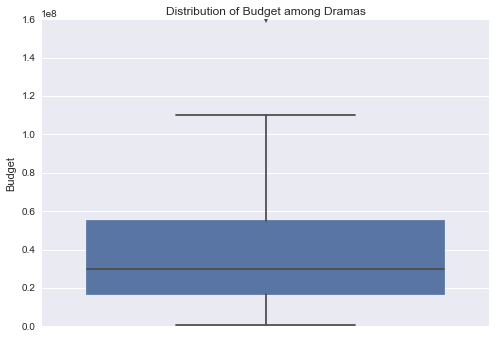

In [138]:
sns.boxplot( y='Budget', 
            data=df_drama);
plt.title('Distribution of Budget among Dramas')

By reading this plot, an observer can easily tell where the middle 50% of budgets for dramas lie, as well as the minimum and maximum for drama budgets. 

(c) Among drama films, there can be multiple creative types (CreativeType), including "Contemporary Fiction", "Historical Fiction", "Dramatization", "Fantasy", and "Science Fiction". Create a boxplot to compare the budget distributions of dramas that belong to these creative types respectively.
Describe at least three findings that you think are worth mentioning to George by reading this visualization.

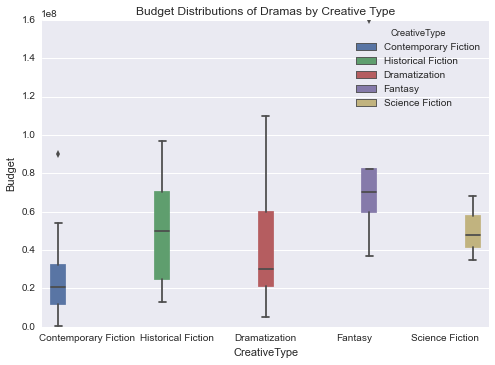

In [139]:
sns.boxplot(x='CreativeType', y='Budget', 
            data=df_drama,
           hue='CreativeType');
plt.title('Budget Distributions of Dramas by Creative Type')

Dramatization has the largest range of budgets, Contemporary Fiction has the lowest minimum budget and the only outlier, and Science Fiction has the smallest range of budgets.

(d) Create a pie chart to show the distribution of the number of movies for each creative type among drama films.
Explain what information can be obtained by reading this plot.

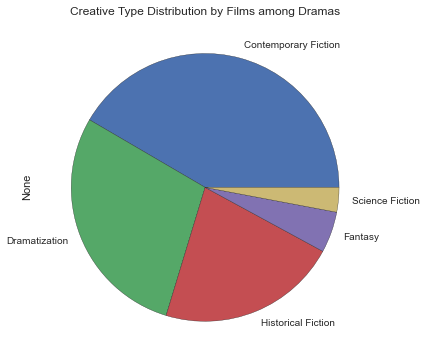

In [140]:
df_drama.CreativeType.value_counts().plot(kind='pie', figsize=(6, 6))
plt.title('Creative Type Distribution by Films among Dramas')

This graph visually shows the number of movies by each creative type among drama films. At a glance it is apparent that Contemporary Fiction has the most and Science Fiction has the least.

(e) Define profit margin for a film as ProfitMargin = (Gross - Budget) / Gross. Add a column of "ProfitMargin" to the DataFrame. Then, create a boxplot comparing the profit margin distributions of dramas that belong to different creative types.
Limit y-axis to be within the range [-5, 1]
Describe at least two findings worth mentioning to George by reading this plot.

In [141]:
df['ProfitMargin'] = (df['Gross']-df['Budget'])/df['Gross']

In [142]:
df_drama_2 = df[df.Genre == 'Drama']

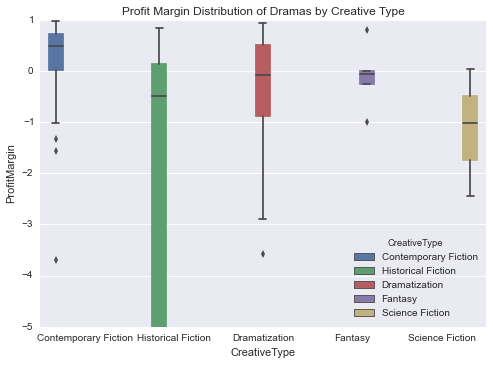

In [143]:
sns.boxplot(x='CreativeType', y='ProfitMargin', 
            data=df_drama_2,
           hue='CreativeType');
plt.ylim(-5,1)
plt.title('Profit Margin Distribution of Dramas by Creative Type')

Historical Fiction has a large range of profit margin, while Fantasy has a very small range.

(f) Create a scatterplot matrix (SPLOM) with the variables of Budget, Gross, ProfitMargin, RunningTime, and RottenTomatoesRating.
Limit to drama films only.
Drop those films whose ProfitMargin is smaller than -1.
Describe which variable exhibits a positive correlation with RunningTime by reading the SPLOM.

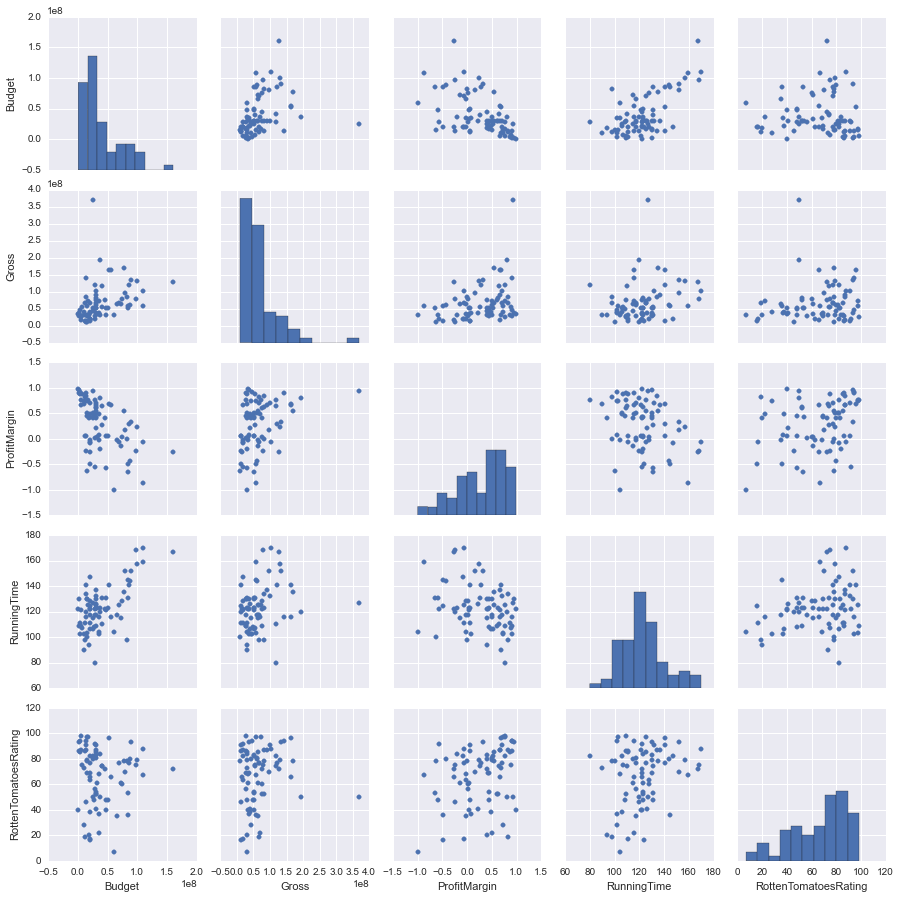

In [144]:
df_cleaned = df[(df.Genre == 'Drama') & (df.ProfitMargin > -1)]
df_cleaned = df_cleaned[['Budget','Gross','ProfitMargin',
                 'RunningTime', 'RottenTomatoesRating']].dropna()
sns.pairplot(df_cleaned);

It appears that RunningTime and Budget exhibit a positive correlation because that scatter plot most closely follows a potential positive regression line.

(g) Calculate the correlation between RunningTime and each of the three variables: Budget, Gross, and ProfitMargin. Use a barchart to present the result.
Use three different correlation metrics: Pearson, Spearman, and Kendall.
Use the same filtered data as in 2(f).
Describe what you see in the visualization.

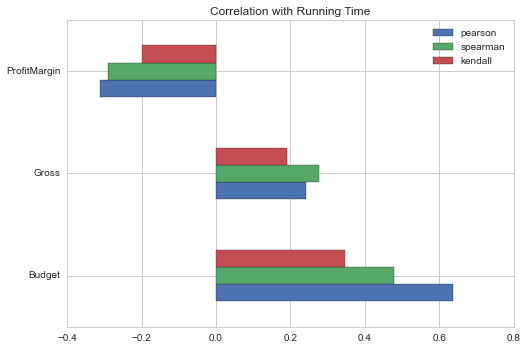

In [145]:
corr_metrics = ['pearson', 'spearman', 'kendall']
other_measurements = ['Budget', 'Gross', 
                      'ProfitMargin']
cols = {m: [df_cleaned['RunningTime'].corr(df_cleaned[x], method=m) 
            for x in other_measurements] 
        for m in corr_metrics}
df_corr = pd.DataFrame(cols, index=other_measurements,
                       columns=corr_metrics)
sns.set(style='whitegrid')
df_corr.plot(kind='barh', 
             title='Correlation with Running Time');

From the graph it is clear that Profit Margin and Running Time have a negative correlation, while Gross and Budget both have positive correlations with Running Time. Budget and Running Time seem to have the strongest positive correlation.

(h) Create a scatterplot with linear fit for Budget vs. RunningTime. Use the same data as in 2(f).

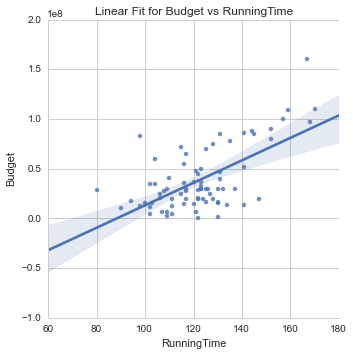

In [146]:
sns.lmplot(x='RunningTime', y='Budget', 
           data=df_cleaned);
plt.title('Linear Fit for Budget vs RunningTime')

(i) Build a linear regression model of Budget from RunningTime, using the same data as in 2(f). Display the summary of the model.

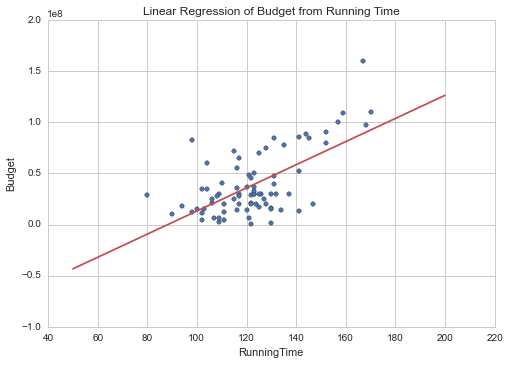

In [147]:
model1 = smf.ols('Budget ~ RunningTime', data=df_cleaned).fit()

xs = np.linspace(50, 200, 2)
ys_predicted = model1.predict({'RunningTime': xs})
plt.scatter(df_cleaned.RunningTime, df_cleaned.Budget)
plt.grid(True)
plt.plot(xs, ys_predicted, 'r');
plt.title('Linear Regression of Budget from Running Time')
plt.xlabel('RunningTime')
plt.ylabel('Budget')

In [148]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Budget   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     52.28
Date:                Tue, 20 Oct 2015   Prob (F-statistic):           3.23e-10
Time:                        15:17:26   Log-Likelihood:                -1436.7
No. Observations:                  78   AIC:                             2877.
Df Residuals:                      76   BIC:                             2882.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept   -9.983e+07   1.94e+07     -5.151      0.000     -1.38e+08 -6.12e+07
RunningTime   1.13e+06   1.56e+05      7.230      0.000      8.19e+05  1.44e+06
==============================================================================
Omnibus:                        4.981   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.184
Skew:                           0.523   Prob(JB):                        0.123
Kurtosis:                       3.441   Cond. No.                         867.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(j) Below is Trend Lines Model description generated using Tableau with the same data.
Explain what each of the following fields means and how they are related to the interpreting the result of the regression.
(j-1): residual degrees of freedom (DF)
(j-2): SSE (sum squared error)
(j-3): MSE (mean squared error)
(j-4): R-Sqaured
(j-5): p-value (significance)

j-1: Residual degrees of freedom is the number of values that are free to vary, in this case there are 76 such values.

j-2: Sum squared error is the sum of the squares of the residuals, which measures the discrepancy between the data and estimated model. Given the small size of this SSE, the discrepancy is low.

j-3: The mean squared error is the average of the squares of the errors, which means the difference between the estimator and what is estimated. Given the small size of this MSE, the difference is small.

j-4: R-squared is the coefficient of determination which measures how close the data are to the fitted line of regression. The 40.8% here shows that the model explains some variability of the response data around its mean.

j-5: The p-value is the probability of getting a result equal to what was observed. The significance level of this is usually 5%, and if the data is equal to or less than that level then we must reject the hypothesis. Here the p-value is < .0001 so we must reject the hypothesis.

*********Used information from Wikipedia to help answer Questions

(k) Use a diagnostic statistic of your choice (e.g., Cook's distance) to identify outliers in the regression model. Filter the outliers, and build a new regression model.
Compare the R-squared values.
Create a scatterplot with the regression lines of both the old and the new models.

In [149]:
# Find outliers using Cook's Distance
influence = model1.get_influence()
cooks_distance = influence.cooks_distance[0]
number_of_observations = len(df_cleaned)

# Use an empirical threshold value
cooks_threshold = 4 / number_of_observations

# Show outliers
df_cleaned[cooks_distance > cooks_threshold]

,Budget,Gross,ProfitMargin,RunningTime,RottenTomatoesRating
17,109000000,58183966,-0.873368,159,67
45,160000000,127509326,-0.254810,167,72
81,82500000,82985708,0.005853,98,78
287,20000000,18354356,-0.089660,147,82
427,29000000,119519402,0.757362,80,82


In [150]:
outlier_criterion = (cooks_distance > cooks_threshold)
outlier_indexes = np.nonzero(outlier_criterion)[0]

df_cleaned2 = df_cleaned[~outlier_criterion]
print("%d points before removal; %d after removal."%(
        len(df_cleaned), len(df_cleaned2)))

78 points before removal; 73 after removal.


In [151]:
model2 = smf.ols('Budget ~ RunningTime', data=df_cleaned2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Budget   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     55.35
Date:                Tue, 20 Oct 2015   Prob (F-statistic):           1.82e-10
Time:                        15:17:26   Log-Likelihood:                -1332.4
No. Observations:                  73   AIC:                             2669.
Df Residuals:                      71   BIC:                             2673.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept   -1.037e+08   1.89e+07     -5.476      0.000     -1.41e+08 -6.59e+07
RunningTime  1.144e+06   1.54e+05      7.440      0.000      8.37e+05  1.45e+06
==============================================================================
Omnibus:                        0.830   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.660   Jarque-Bera (JB):                0.874
Skew:                           0.110   Prob(JB):                        0.646
Kurtosis:                       2.512   Cond. No.                         962.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

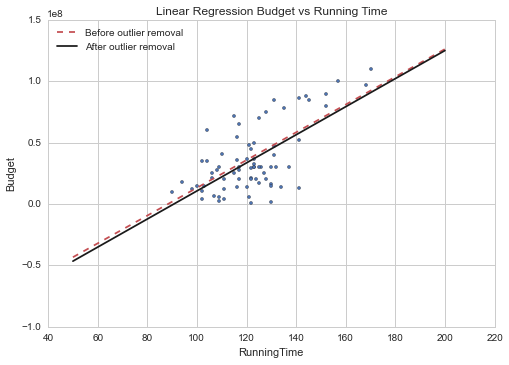

In [152]:
# Plot the old and new regression lines together
xs = np.linspace(50, 200, 2)
ys1 = model1.predict({'RunningTime': xs})
ys2 = model2.predict({'RunningTime': xs})
plt.scatter(df_cleaned2.RunningTime, df_cleaned2.Budget, 
            s=10, marker='o')
plt.scatter(df_cleaned.ix[outlier_indexes, 'RunningTime'], 
            df_cleaned.ix[outlier_indexes, 'Budget'], 
            s=10, color='r', marker='o')
plt.plot(xs, ys1, 'r--', label='Before outlier removal')
plt.plot(xs, ys2, 'k', label='After outlier removal')
plt.legend(loc='upper left')
plt.xlabel('RunningTime')
plt.ylabel('Budget')
plt.title('Linear Regression Budget vs Running Time')
plt.grid(True)

The R-squared value in this new linear regression model, with outliers removed, is .438 where in the original mdoel it was .408. This shows that the data now is closer to the fitted regression line than it was previously.

(l) Summarize the above analysis, and make recommendations to George regarding the following aspects of the new movie:
recommend a creative type
recommend a range of running time
recommend a range of production budget

I reccommend Contemporary Fiction because it is the only creative type where the top 75% of the Profit Margin is positive, with the median Profit Margin around .5. It also has the lowest range of budgets per film and the largest number of films.

For the range of production budget I reccommend staying in the middle 50% of the Contemporary Fiction box plot from part 2(c), meaning from around 12.5 to 35 million. 

Based on the results from part 2(h), if we are looking at a budget of around 12.5 to 35 million then it would make sense to stay in the range of 100 to 120 minutes.

# 3. Open-ended Analysis

(a) Based on your recommended creative type and production budget in Problem 2, perform additional analysis and recommend the following to George regarding the new movie:
recommend a director
recommend a distributor

 

In [153]:
df_rec = df[(df.Genre == 'Drama') & (df.CreativeType == 'Contemporary Fiction') & (df.Budget > 12500000) & (df.Budget < 35000000)]
df_rec.sort('Gross', ascending=False).head()

,Title,Gross,Budget,ReleaseDate,MPAARating,RunningTime,Distributor,Source,Genre,CreativeType,Director,RottenTomatoesRating,IMDBRating,ProfitMargin
358,Slumdog Millionaire,141319928,14000000,2008-11-12,R,116,Fox Searchlight,Original Screenplay,Drama,Contemporary Fiction,Danny Boyle,94,8.3,0.900934
248,Million Dollar Baby,100492203,30000000,2004-12-15,PG-13,132,Warner Bros.,Based on Book/Short Story,Drama,Contemporary Fiction,Clint Eastwood,91,8.2,0.701469
275,Mystic River,90135191,30000000,2003-10-08,R,137,Warner Bros.,Based on Book/Short Story,Drama,Contemporary Fiction,Clint Eastwood,87,8.0,0.667167
281,The Notebook,81001787,30000000,2004-06-25,PG-13,123,New Line,Based on Book/Short Story,Drama,Contemporary Fiction,Nick Cassavetes,52,8.0,0.629638
6,Four Brothers,74494381,30000000,2005-08-12,R,109,Paramount Pictures,Original Screenplay,Drama,Contemporary Fiction,John Singleton,52,6.8,0.597285


I filtered the data by Contemporary Fiction and my chosen Budget range. From this I reccommend Warner Bros and Clint Eastwood because together they have two of the highest grossing movies that fit these criteria. 

(b) What are the limitations of the above analyses (including the analyses in Problem 2)? How can you potentially improve them?

One limitation is that it is difficult to determine, looking at these analyses, where all of the important points lay. This could be improved by better labeling the x and y axis and identifying certain important points with labels/tags directly on the graph. Also, only quantitative data can be statistically analyzed, so we can judge which Director or Distributor to use based on these analyses of data but we cannot measure how "good" a director or distributor truly is. Another limitation, as always, is human error.

(c) Correlation, of course, does not mean causation.  What would you tell George about how to interpret your recommendations given this?

I would tell George to take my recommendations as a suggestion because the analyses I have conducted are limited and there are no guarantees that following the data from these correlations will give us the desired outcome.